In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

Populating the interactive namespace from numpy and matplotlib


Заповнення інтерактивного простору імен з numpy та matplotlib.

In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

Цей контент є частиною серії після розділу 3 про ймовірність з [Книги поглибленого навчання] (http://www.deeplearningbook.org/) Goodfellow, I., Bengio, Y., та Courville, A. (2016). Його ціллю є забезпечення інтуїцією / малюнками / кодом мовою python з математичних теорій і побудований як моє розуміння цих понять.

Ви можете знайти відповідний пост [тут](https://hadrienj.github.io/posts/Marginal-and-Conditional-Probability/) в моєму блозі.

Ми вивчили основи ймовірності в [останньому дописі](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/) / [блокноті](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions), присвяченому розділам 3.1 - 3.3 з Книги поглибленого навчання. Ми дізналися, що таке випадкова величина, функція маси ймовірності або функція щільності ймовірності. Метою було також отримати більш інтуїтивного розуміння щодо часто використовуваних інструментів, таких як похідні, площа під кривою та інтеграли.

У цьому другому дописі / блокноті про граничну та умовну ймовірність ви дізнаєтесь про спільну та граничну ймовірність дискретних та неперервних змінних. Після цього, ми побачимо поняття умовної ймовірності та різницю між залежними та незалежними подіями. Все це відповідає розділам 3.4 та 3.5 з Книги поглибленого навчання.

Ми наполягатимемо на математичних позначеннях, що використовуються у вірогідності. Ви побачите, що це виразний і синтетичний спосіб вираження ідей!


# 3.4 Гранична ймовірність

У попередніх постах ми бачили ймовірність однієї випадкової величини за раз. У деяких випадках може бути цікаво побачити ймовірність багатьох подій. Наприклад, ми можемо запитати: "Якщо я підкину монету два рази, яка ймовірність отримати рівно одну "решку"і один "орел"? Для відповіді на подібні запитання нам потрібно враховувати кілька подій.

### Примітка

Почнемо з деяких деталей про позначення. Як завжди, важливо слідкувати, щоб кожен окремий фрагмент математичних позначень був кристально чистим. На наступному малюнку наведено позначення, які ми будемо використовувати в цій статті 🔧:


<img src="images/summary-mathematical-notation.png" width="500">

_Словник математичних виразів та відповідні їм англійські переклади._

Як ми бачили в останньому пості, $P(\text{x}=x,\text{y}=y)$ відноситься до __спільної ймовірності__ того, що $\text{x}$ приймає конкретне значення $x$ __і__ що $\text{y}$ приймає конкретне значення $y$. Для отримання детальної інформації про позначення ви також можете звернутися до попередньої статті. Ви також можете зустріти позначення перетину: $\cap$. Наприклад, $P(\text{x}\cap\text{y})$ відповідає ймовірності виникнення як $\text{x}$, так і $\text{y}$.


### Приклад 1

Давайте почнемо з прикладу, щоб розібратись з поняттям граничної ймовірності.

У цьому експерименті ми підкидаємо монету (перша подія) і кидаємо гральні кубики (друга подія). Ми розглядаємо ймовірність кожної події. Наприклад, ймовірність отримати "орла" становить $\frac{1}{2}$. Імовірність випадіння 1 дорівнює $\frac{1}{6}$. На наступному малюнку показані ймовірності кожного результату для кожної події окремо:

<img src="images/marginal-probabilities-empty.png" width="500">

_Ймовірність двох подій (кидання монети та кидання кубика) представлено індивідуально._

Ви можете бути здивовані тим, що я відобразив вірогідності в таблиці. Власне, я підійшов до проблеми задом наперед: ці ймовірності є __граничними ймовірностями__. Назва "граничний" підштовхує до ідеї, що ми можемо писати їх на полях таблиці.

Виникає питання: які ще ймовірності ми могли б записати в середині таблиці? __Спільні ймовірності__. Це ймовірність отримати два конкретні результати:

<img src="images/marginal-probabilities.png" width="500">

_Гранична ймовірність. Представлені ймовірності двох подій (кидання монети та кидання кубика). Граничні ймовірності знаходяться на "границі" і відповідають ймовірностям кожної події._

Наприклад, ми можемо побачити, що ймовірність отримати одиницю 1 і „орла” дорівнює $\frac{1}{6}\times\frac{1}{2}=\frac{1}{12}$. __Граничні ймовірності__ представлені на полях і відповідають розподілу ймовірностей підмножини змінних.


### Правило суми

Іноді ви знаєте спільну ймовірність подій і вам потрібно порахувати на її основі граничні ймовірності. Граничні ймовірності обчислюються за правилом суми. Якщо поглянути на останню таблицю, можна побачити, що ймовірності, записані на полях, є сумою ймовірностей відповідного рядка чи стовпця.

Виразивши це математично, маємо:

$$
\forall x \in \text{x}, P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

Ми розглянемо деталі цього рівняння.

По-перше, згадайте, що гарнітура є важливою, і вказує на різні речі. $\text{x}$ - це дискретна випадкова величина (наприклад, що відповідає киданню кубика), а $x$ - результат випадкової події (наприклад, один із можливих результатів кубика: 1, 2, 3, 4, 5 або 6). Точно так само, $\text{y}$ є випадковою величиною (припустимо, відповідає підкиданню монети), а $y$ - результат $\text{y}$ ('орел' або 'решка').

<img src="images/sum_rule_1.png" width="500">

<li>$\forall x\in\text{x}$ можна прочитати "для всіх $x$ в $\text{x}$". Тут це умова істинності рівняння. Отже, вираз є істинним лише тоді, коли результат $x$ є одним із можливих результатів $\text{x}$. Наприклад, якщо випадкова змінна $\text{x}$ відповідає киданню кубика, ми знаємо, що $x$ може приймати значення 1, 2, 3, 4, 5 або 6. Рівняння відповідає дійсності лише тоді, коли $x$ насправді приймає одне з цих значень.</li>

<img src="images/sum_rule_2.png" width="500">

<li>$P(\text{x}=x)$ - це ймовірність того, що $\text{x}$ прийме конкретне значення $x$. Наприклад, як і раніше в експерименті з кубиками, $P(\text{x}=6)$ відповідає ймовірності випадіння шістки.</li>

<img src="images/sum_rule_3.png" width="500">

<li>Символ суми $\sum_{y}$ означає, що ми сумуємо елементи, які знаходяться після символу (тут $P(\text{x}=x, \text{y}=y)$). Невеликий $y$ під символом суми означає, що ми підсумовуємо всі можливі значення $y$ ($P(\text{x}=x, \text{y}=1)$, $P(\text{x}=x, \text{y}=2)$ тощо).</li>

<img src="images/sum_rule_4.png" width="500">

<li>$P(\text{x}=x, \text{y}=y)$ - це ймовірність того, що $\text{x}$ приймає значення $x$, а $\text{y}$ приймає значення $y$.</li>

Тож тепер ми можемо поглянути на те, про що говорять ці рівняння:

$$
P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

Це означає, що ймовірність того, що $\text{x}=x$ дорівнює сумі ймовірностей, що відповідають $\text{x}=x$ для кожного $y$. Наступний приклад пояснить це твердження.


### Приклад 2

Як і в останньому прикладі, ми проведемо експеримент, де кинемо кубик і кинемо монету. В центрі вищенаведеної таблиці вказані ймовірності того, що і $\text{x}$, і $\text{y}$ приймають певне значення, тобто, ми отримуємо конкретні результати для кидання як кубика так і монети. Наприклад, ймовірність випадіння 1 і "орла" становить $P(\text{x}=1,\text{y}= 'орел') = \frac{1}{12}$

<img src="images/sum-rule-example.png" width="500">

_Спільна ймовірність випадіння орла і 1._

Ми можемо використати попереднє рівняння:

$$
P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

Отже, скажімо, що ми хочемо обчислити ймовірність викинути 1:

$$
P(\text{x}=1) = \sum_{y} P(\text{x}=1, \text{y}=y)
$$

Це сума ймовірностей для $ \text {y} $, коли $ \text {x} = 1 $. Є дві можливості: у нас може бути $ \text {x} = 1 $ і $ \text {y} = 'орел' $ або $ \text {x} = 1 $ і $ \text {y} = 'решка' $. Говорячи більш математично можна сказати, що:

$$
\sum_y P(\text{x}=1, \text{y}=y) = P(\text{x}=1, \text{y}='heads') + P(\text{x}=1, \text{y}='tails') = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}
$$

Чи має це сенс? Оскільки кожен випадок $ \text {y} $ врахований, це лише ймовірність випадіння 1. Це називається __граничною ймовірністю__.

Я сподіваюся, що тепер записи зрозумілі. Не хвилюйтеся, якщо ви ще не володієте цими математичними символами: це лише питання звичок. Ви побачите, що це корисний і синтетичний спосіб мислення.

### Безперервні змінні

Цей самий прийом можна використовувати для неперервних змінних, але нам потрібно використовувати інтеграцію замість підсумовування. Пригадаємо, що для безперервних змінних ймовірність того, що змінна прийме конкретне значення, становить близько $ 0 $, оскільки існує нескінченна кількість можливостей [(пор. Останній допис](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/3.4-3.5%20Marginal%20and%20Conditional%20Probability/3.4%20-%203.5%20Marginal%20and%20Conditional%20Probability.ipynb)
[/ блокнот)](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)

### Приклад 3

Скажімо, у нас є спільна функція щільності ймовірності двох змінних $ \text {x} $ і $ \text {y} $, і ми хочемо обчислити граничну ймовірність. По-перше, нам потрібні три значення для представлення функції щільності ймовірності: значення змінної $ \text {x} $, значення змінної $ \text {y} $ та ймовірність, пов'язана з отриманням обох цих значень.

Наприклад, припустимо, що $ \text {x} $ і $ \text {y} $ представлені нормальним розподілом. Функція з Numpy random.normal () (cf. [Doc](https://numpy.org/doc/stable/reference/generated/numpy.random.normal.html)) створює вектор значень, взятих із нормального розподілу. Перший аргумент - середнє значення розподілу, другий - стандартне відхилення, а третій - кількість вибірок.

Наприклад, np.random.normal(0, 1, 1000) створює вектор довжиною 1000:

In [4]:
np.random.seed(123)
x = np.random.normal(0, 1, 1000)
x.shape

(1000,)

Якщо взяти середнє значення всіх значень у цьому векторі, ми отримаємо значення близьке до 0:

In [5]:
x.mean()

-0.03956413608079184

Ми отримали б середнє значення ближче ніж 0 з більшою кількістю значень у векторі.

Стандартне відхилення підказує, чи відхиляються окремі значення, більше чи менше, від середнього.

Тож давайте створимо два наші безперервні розподіли:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


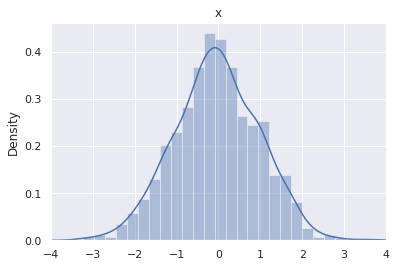

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


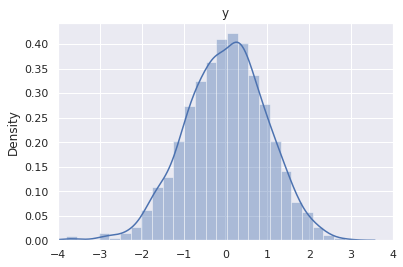

In [6]:
np.random.seed(123)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

sns.distplot(x)
plt.title('x')
plt.xlim(-4, 4)
plt.show()
sns.distplot(y)
plt.title('y')
plt.xlim(-4, 4)
plt.show()

Спробуємо зрозуміти, що насправді представлено на цих графіках. Я використав функцію distplot з пакета seaborn. Вісь y дає __щільність ймовірності__ того, що змінна приймає значення, задане віссю x. Детальніше про функції щільності ймовірності ви можете знайти в [останньому дописі](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/) / [блокноті](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions). Коротше кажучи, площа під кривою повинна бути розрахована для певного діапазону осі х, щоб отримати ймовірність отримати значення в цьому діапазоні.

А як щодо граничних ймовірностей? Якщо ми хочемо отримати граничну ймовірність $ \text {x} $, нам потрібно отримати __площу області під кривою__ функції щільності ймовірності вздовж осі y. Ви можете собі уявити, що ми дивимося на 3D-графік лише з осі y (або проекції на цю вісь) і отримуємо площу під кривою.

Для дискретних змінних $ \text {x} $ і $ \text {y} $ ми побачили, що гранична ймовірність $ P (\text {x}) $ - це сума ймовірностей для кожного значення $ \text {y } $. Тепер, коли наші змінні безперервні, ми повинні використовувати __інтеграли__, але принцип той же:

<li>Для обчислення граничної ймовірності $ P (\text {x}) $ ми обчислюємо площу під кривою проекції змінної на вісь x.</li>
<li>Для обчислення граничної ймовірності $ P (\text {y}) $ ми обчислюємо площу під кривою проекції змінної на вісь y.</li>

<img src="desktop/img/bivariate-gaussian-curves.png" width="500">

Функції щільності ймовірності двох гауссових змінних - [джерело](https://en.wikipedia.org/wiki/Marginal_distribution)

Це використовується для відновлення розподілу ймовірностей однієї змінної, коли ми знаємо спільний розподіл ймовірностей.

Це можна виразити за допомогою такого рівняння:

$$
p(x) = \int p(x, y)dy
$$

і

$$
p(y) = \int p(x, y)dx
$$

Щоб отримати додаткові пояснення щодо інтеграції, ви можете ознайомитися з цим [дописом](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/) / [блокнотом](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions). Змінна, що слідує за малим $ d $ в кінці рівняння, повідомляє змінну, яка використовується для інтегрування. Отже, у першому рівнянні ми інтегруємо над $ \text {y} $. Це означає, що ми розглядаємо $ \text {x} $ як константу. У другому рівнянні ми робимо навпаки.


# 3.5 Умовна ймовірність

Умовна ймовірність відноситься до ймовірності події, враховуючи, що сталася інша подія.

### Залежні та незалежні події

По-перше, важливо розрізняти залежні та незалежні події! В обох випадках інтуїція дещо інша.


#### Приклад незалежних подій: кубик та монета

У цьому прикладі ми робимо експеримент, коли кидаємо кубик і кидаємо монету. Ми будемо називати дві випадкові величини, що описують ці події, з $ \text {x} $, що відповідає киданню кубика, і $ \text {y} $, що відповідає підкиданню монети.

Запитання, яке ми можемо задати, таке: яка ймовірність отримати 3 від кидка кубикав і "орла" від підкидання монети?

Ми бачимо, що ці дві події є незалежними, оскільки ми не очікуємо жодного впливу однієї на іншу.


#### Приклад залежних подій: дві карти з колоди

У цьому прикладі ми дістаємо дві карти з колоди без заміни. Імовірності різні, коли ми беремо першу карту (всі 52 карти знаходяться в колоді) і коли беремо другу карту (зараз 51 карта, одна відсутня). Це означає, що події залежать: результат першого розіграшу вплине на ймовірність другого розіграшу.

Питання, яке ми можемо задати, таке: якою є ймовірність витягнути 6 на другому розіграші, коли ми отримали 6 на першому розіграші?


### Примітка

<img src="desktop/img/conditional-probability.png" width="500">

_Умовна ймовірність_

Давайте введемо кілька нових позначень: $ P (\text {y} = y | \text {x} = x) $ описує умовну ймовірність: це ймовірність того, що випадкова величина $ \text {y} $ приймає конкретне значення $ y $, враховуючи, що випадкова змінна $ \text {x} $ прийняла конкретне значення $ x $. Це відрізняється від $ P (\text {y} = y, \text {x} = x) $, що відповідає ймовірності отримання результату $ y $ для випадкової змінної $ \text {y} $ і $ x $ для випадкової змінної $ \text {x} $. У випадку умовної ймовірності подія, пов'язана з випадковою величиною $ \text {x} $, вже дала свої результати ($ x $).

Математично існує зручна залежність між умовною ймовірністю та спільною ймовірністю:

$$
P (\text {y} = y | \text {x} = x) = \frac {P (\text {y} = y, \text {x} = x)} {P (\text {x} = х)}
$$

Давайте будемо багатослівним і опишемо рівняння простою мовою:

Імовірність того, що випадкова змінна $ \text {y} $ приймає значення $ y $, враховуючи, що випадкова величина $ \text {x} $ прийняла значення $ x $, це відношення ймовірності того, що відбудуться обидві події ($ \text {y} $ приймає значення $ y $, а $ \text {x} $ приймає значення $ x $) і ймовірність того, що $ \text {x} $ приймає значення $ x $.

Можливо, буде більш зрозуміло, якщо поглянути на це в іншому напрямку:

$$
P (\text {y} = y, \text {x} = x) = P (\text {x} = x) P (\text {y} = y | \text {x} = x)
$$

Це можна зрозуміти так: щоб розрахувати ймовірність того, що відбудуться обидві події, ми повинні взяти ймовірність того, що настає перша подія ($ P (\text {x} = x) $) і помножити її на ймовірність того, що подія відбувається з огляду на те, що сталася перша подія ($ P (\text {y} = y | \text {x} = x) $). Зрозуміло?

#### Множення ймовірностей

Останнє пояснення підштовхує до запитання. Ми використовували множення ймовірностей ($ P (\text {x} = x) $, помножене на $ P (\text {y} = y | \text {x} = x) $), щоб представити ймовірність виникнення декількох подій ($ P (\text {y} = y, \text {x} = x) $). Давайте подивимося, чому це має сенс.

<img src="desktop/img/inside-probability.png" width="500">

_Ймовірність - це відношення між кількістю успішних результатів та загальною кількістю результатів_

Візьмемо дві незалежні події: ми кидаємо монету двічі (перший раз відповідає першій події, а другий раз - другій події) і хочемо обчислити ймовірність випадіння рівно двох "орлів". Ми знаємо, що ймовірність отримати "орла" при кожному випробуванні становить $ \frac {1} {2} $.

Щоб зрозуміти, чому потрібно використовувати множення ймовірностей, нам потрібно зрозуміти, яка ймовірність кожної події. Зупинимось на першій події, першому підкиданні монети. Імовірність $ \frac {1} {2} $: (1) відповідає кількості результатів "успіху" (тобто отримати "орла"). Знаменник (2) відповідає загальній кількості можливостей. Можливими результатами є "орли" або "решки", тому є два результати. Це призводить до нашої ймовірності $ \frac {1} {2} $.

Тепер, якщо ми розглянемо дві події, ось усі можливі результати:

<li>"орел","орел"</li>
<li>"орел","решка"</li>
<li>"решка","орел"</li>
<li>"решка","решка"</li>

У нас є 1 результат успіху («орел» та «орел»), а взагалі є 4 можливі результати. Таким чином, ймовірність отримати "орла" та "орла" становить $ \frac {1} {4} $.

Хитрість тут. Щоб отримати загальну кількість можливих результатів, нам просто потрібно помножити кількість результатів кожної події. У цьому випадку $ 2 \ разів 2 $. Якщо помножити ймовірності подій, то маємо: $ \frac {1} {2} \times \frac {1} {2} = \frac {1} {4} $.

Щоб бути впевненим, що умовна ймовірність є зрозумілою, ми візьмемо приклад для незалежних та залежних подій. Крім того, докладніше про поняття незалежності пояснюється в 3.7.

Ми почнемо з випадку незалежних подій.


### Приклад4

По-перше, давайте згадаємо всі необхідні нам математичні позначення. $ P (\text {x} = x) $ - це ймовірність того, що змінна $ \text {x} $ прийме стан $ x $. Наприклад, $ P (\text {x} = 3) $ відповідає ймовірності викинути 3 на кубику. Подібним чином $ P (\text {y} = y) $ - це ймовірність того, що випадкова величина $ \text {y} $ прийме значення $ y $. Наприклад, $ P (\text {y} = 'орел') $ відповідає ймовірності отримати 'орел'.

$ P (\text {y} = y, \text {x} = x) $ - спільна ймовірність цих подій. Наприклад, $ P (\text {x} = 3, \text {y} = 'орел') $ - це ймовірність викинути 3 на кубику і отримати "орла" на монеті. У цьому прикладі, скажімо, ми знаємо, що $ P (\text {x} = 3, \text {y} = 'орел') = \frac {1} {12} $.

$ P (\text {y} = y | \text {x} = x) $ відповідає ймовірності того, що $ \text {y} = y $ з урахуванням того, що $ \text {x} = x $. Отже, це умовна ймовірність. Наприклад, $ P (\text {y} = 'орел' | \text {x} = 3) $ відповідає ймовірності отримати "орла" з огляду на те, що ми вже викинули 3 на кубику.

Зверніть увагу, що $ P (\text {y} = 'орел' | | text {x} = 3) = P (\ text {y} = 'heads') $, оскільки ці події незалежні. Це означає, що ймовірність $ \text {x} $ однакова для будь-якого результату $ \text {y} $.

У нашому прикладі ми маємо:

$$
P(\text{y}='heads' | \text{x}=3) = \frac{P(\text{y}='heads', \text{x}=3)}{P(\text{x}=3)} = \frac{\frac{1}{12}}{\frac{1}{6}} = \frac{6}{12} = 0.5
$$

Ми бачимо, що справді $ P (\text {y} = 'орел' \text {x} = 3) = P (\text {y} = 'орел') = 0,5 $.

І ми закінчимо цю статтю на прикладі із залежними подіями.

### Приклад 5.

У цьому прикладі ми тягнемо дві карти без заміни. Першим кроком є використання вивченого та написання задачі за допомогою математичних позначень. Ми назвемо $ \text {x} $ змінною, що відповідає першому малюнку, а $ \text {y} $ змінною, що відповідає другому малюнку. Випадкові змінні $ \text {x} $ і $ \text {y} $ можуть приймати значення 1, 2, 3, 4, 5 або 6. Це можливі результати змінних.

Ми побачили, що загальною формулою для обчислення умовної ймовірності є:

$$
P (\text {y} = y | \text {x} = x) = \frac {P (\text {y} = y, \text {x} = x)} {P (\text {x} = х)}
$$

Ми хочемо знати ймовірність витягнути 6 на другому розіграші, враховуючи те, що ми витягнули 6 на першому розіграші. Ми можемо записати це так: $ P (\text {y} = 6 | \text {x} = 6) $.

Нам знадобиться:
<li>Ймовірність витягнути 6 на першому розіграші ($ P (\text {x} = 6) $)</li>

<li>Ймовірність витягнути 6 як на першому, так і на другому розіграші ($ P (\text {y} = 6, \text {x} = 6) $)</li>

На момент першого розіграшу ймовірність витягнути 6 дорівнює $ \frac {4} {52} $ (у колоди 52 карт є 4 шість), тому $ P (\text {x} = 6) = \frac {4} {52} $. Ймовірність витягнути пару 6:

$$
P (\text {y} = 6, \text {x} = 6) = \frac {4} {52} \times \frac {3} {51} = \frac {12} {2652} = \frac { 1} {221}
$$

Умовна ймовірність, яку ми хочемо обчислити, така:

$$
P (\text {y} = 6 | \text {x} = 6) = \frac {P (\text {y} = 6, \text {x} = 6)} {P (\text {x} = 6)} = \frac {\frac {1} {221}} {\frac {4} {52}} = \frac {1} {221} \times \frac {52} {4} = \frac {1 } {221} \times 13 = \frac {13} {221} = 0,0588
$$
Це означає, що ми маємо майже 6% шансу витягнути 6, коли ми вже витягнули одну 6. Ми можемо зазначити, що це відповідає $ \frac {3} {51} $ (детальніше в наступному розділі).


# Висновок

Ми побачили, що гранична ймовірність відноситься до ймовірності однієї події в експериментах з кількома подіями. Між цими граничними ймовірностями та спільними ймовірностями існують зв’язки, що виражають ймовірність того, що відбудуться обидві події.

Ми також говорили про умовну ймовірність. Це відповідає ймовірності за певних умов, наприклад, ймовірності витягнути шістку в колоді карт, знаючи, що ми вже витягнули шістку і не замінили її. Ми досліджували випадки залежних та незалежних подій.

Сподіваюсь, ця стаття допомогла вам використовувати та читати математичні позначення, що лежать в основі цих понять.

# Джерела
[deepLearningBook-Notes](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/3.4-3.5%20Marginal%20and%20Conditional%20Probability/3.4%20-%203.5%20Marginal%20and%20Conditional%20Probability.ipynb)

Переклад: Худоба Василь, студент ІО-02мп, 2020 рік